<a href="https://colab.research.google.com/github/kimheeseo/python/blob/main/171_180.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 활용 171. URL에 접속하여 HTML 페이지를 파일로 저장하기
from urllib.request import urlopen

url='https://www.python.org/'
with urlopen(url) as f:
  doc=f.read().decode()
# HTML 소스코드는 텍스트로 되어 있으므로, 바이트스트림을 텍스트로 변환하고 doc으로 둡니다.
  print('doc값:',doc)
  with open('pythonhome.html','w') as h:
    h.writelines(doc)

doc값: <!doctype html>
<!--[if lt IE 7]>   <html class="no-js ie6 lt-ie7 lt-ie8 lt-ie9">   <![endif]-->
<!--[if IE 7]>      <html class="no-js ie7 lt-ie8 lt-ie9">          <![endif]-->
<!--[if IE 8]>      <html class="no-js ie8 lt-ie9">                 <![endif]-->
<!--[if gt IE 8]><!--><html class="no-js" lang="en" dir="ltr">  <!--<![endif]-->

<head>
    <!-- Google tag (gtag.js) -->
    <script async src="https://www.googletagmanager.com/gtag/js?id=G-TF35YF9CVH"></script>
    <script>
      window.dataLayer = window.dataLayer || [];
      function gtag(){dataLayer.push(arguments);}
      gtag('js', new Date());
      gtag('config', 'G-TF35YF9CVH');
    </script>
    <!-- Plausible.io analytics -->
    <script defer data-domain="python.org" src="https://plausible.io/js/script.js"></script>

    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <link rel="prefetch" href="//ajax.googleapis.com/ajax/libs/jquery/1.8.2/jquery.min.js">
    <link rel="pref

In [6]:
# 활용 172. 인터넷에 있는 이미지를 내 pc로 저장하기
from urllib.request import urlopen

imgurl='https://imgnews.pstatic.net/image/277/2024/07/21/0005448422_001_20240721093911112.jpg'
imgname=imgurl.split('/')[-1] # 0005448422_001_20240721093911112.jpg
print('imgname값:',imgname)

try:
  with urlopen(imgurl) as f:
    with open(imgname, 'wb') as h: # 바이너리 쓰기 모드로 오픈하여 핸들을 h로 둡니다.
      img=f.read() # f.read()로 이미지 파일을 인터넷으로부터 읽어
      h.write(img) # imgname으로 지정된 파일에 저장합니다.
except Exception as e:
  print(e)

imgname값: 0005448422_001_20240721093911112.jpg


In [7]:
# 활용 173. 인터넷에 있는 대용량 파일을 내 pc로 저장하기
from urllib.request import urlopen

BUFSIZE=256*1024

fileurl='https://www.python.org/ftp/python/3.8.2/python-3.8.2.exe'
filename=fileurl.split('/')[-1]

try:
  with urlopen(fileurl) as f:
    with open(filename,'wb') as h:
      buf=f.read(BUFSIZE) # fileurl을 bufsize만큼 읽어 buf로 지정하고 while문으로 진입합니다.
      while buf:
        h.write(buf) # 로컬 파일인 filename에 buf로 지정된 데이터를 저장하고, fileurl에서
        buf=f.read(BUFSIZE) # 다시 bufsize만큼 읽고 buf로 두는 반복을 buf에 데이터가 담기지 않을 때까지 계속 수행.
except Exception as e:
  print

In [8]:
# 활용 174. 10MB 파일을 1MB 파일 10개로 분리하기
filename='python-3.8.2.exe'
subsize=1024*1024*3 # 3MB
suffix=0

with open(filename,'rb') as f:
# 원본 파일을 바이너리 읽기 모드(rb)로 오픈하고 subszie만큼 읽은 데이터를 buf로 둔다.
  buf=f.read(subsize)
  while buf:
# python -3.8.2.exe 파일 크기: 30MB크기이며, 3MB 크기의 파일 10개로 분리할 것이므로, 서브 파일의 크기는 3MB로 설정.
    subfilename=filename+'_'+str(suffix)
    with open(subfilename, 'wb') as h:
      h.write(buf)
      print('[%s] 완료' %subfilename)

    buf=f.read(subsize)
    suffix+=1

[python-3.8.2.exe_0] 완료
[python-3.8.2.exe_1] 완료
[python-3.8.2.exe_2] 완료
[python-3.8.2.exe_3] 완료
[python-3.8.2.exe_4] 완료
[python-3.8.2.exe_5] 완료
[python-3.8.2.exe_6] 완료
[python-3.8.2.exe_7] 완료
[python-3.8.2.exe_8] 완료


In [ ]:
# 활용 175. 1MB 파일 10개를 합쳐서 10MB 파일로 만들기
BUFSIZE=256*1024 # 버퍼사이즈를 256KB로 설정.
merge_filename='ret.exe'
filelist=['python-3.5.2..exe_'+str(x) for x in range(10)]

with open(merge_filename, 'wb') as f:
  for filename in filelist:
    print('[%s]합치는 중..'%filename)
    with open(filename,'rb') as h:
      buf=h.read(BUFSIZE)
      while buf:
        f.write(buf)
        buf=h.read(BUFSIZE)
print('파일 합치기가 완료되었습니다.')
# ret.exe가 생성되었는 지 확인합니다. ret.exe를 실행하여 python-3.5.2.exe와 마찬가지로 파일이 실행되면 정상적으로 합쳐진 것입니다.

In [ ]:
# 활용 176. 파일을 zip 압축 파일로 만들기
from zipfile import *

def compressZip(zipname, filename):
# compressZip(zipname, filename): filename으로 지정된 파일을 ZIP으로 압축하여 zipname으로 지정된 파일로 저장하는 함수

  print('[%s]->[%s]압축..' %(filename, zipname))
  with ZipFile(zipname,'w') as ziph:
    ziph.write(filename)
# Zip 파일을 기록하려면 ZipFile객체를 쓰기 모드로 생성해야 합니다. 이는 파일을 쓰기 모드로 오픈하는 것과 비슷하지만
# 압축 알고리즘을 구동해야 하므로 일반적인 파일을 오픈하는 것과는 달리 ZipFile객체를 이용하게 됩니다.

# ziph.write(filename): zip파일에 filename의 데이터를 zip으로 압축하여 기록.
  print('압축이 끝났습니다.')

filename='mydata.txt'
zipname=filename+'.zip'
compressZip(zipname, filename)

In [13]:
# 활용 177. 디렉터리를 하나의 zip 압축 파일로 만들기
from zipfile import *
import os

def compressAll(zipname, fodler):
  print('[%s->[%s]압축]' %(folder, zipname))
  with ZipFile(zipname, 'w') as ziph:
    for dirname, subdirs, files in os.walk(folder):
# os.walk(folder): folder의 모든 하위 디렉터리 및 파일들을 탐색하여 리스트로 리턴합니다.
# dirname: 탐색 디렉터리 이름, subdirs: 찾은 서브 디렉터리 이름, files: 찾은 파일 이름
      ziph.write(os.path.join(dirname,file))
# 압축해야 할 대상은 files에 나열된 파일들. files의 요소는 경로 정보가 없이 파일이름만으로 구성.

folder='tmp'
zipname=folder+'.zip'
compressAll(zipname, folder)

[tmp->[tmp.zip]압축]


In [8]:
# compressAII(zipname, folder): folder로 지정된 디렉터리에 포함된 모든 하위 디렉터리 및 파일들을 ZIP으로
# 압축하여 zipname 파일에 저장하는 함수.

# os 모듈의 walk()
# [('tmp', ['tmp2','tmp3'],['file1','file2','file3']),
# ('tmp/tmp2',[],['file4','file5']),
# ('tmp/tmp3', [],[])]

# [('탐색 디렉터리 이름', ['찾은 서브 디렉터리 이름'],['찾은 파일 이름'])]

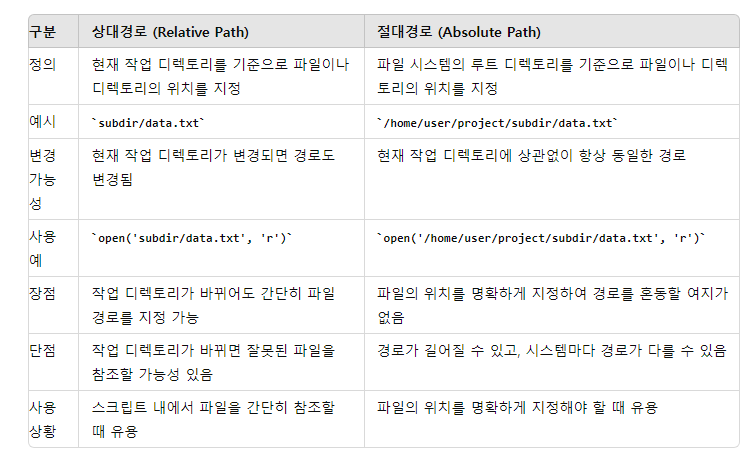

In [ ]:
# 활용 178. Zip 파일 압축 풀기
from zipfile import *
# zipfile 모듈의 모든 것을 임포트합니다.

def extractZip(zipname):
  with ZipFile(zipname, 'r') as ziph:
    ziph.extractall()
# ZipFile 객체의 extractall(): Zip파일의 모든 내용을 압축 해제합니다.

    print('[%s]가 성공적으로 추출되었습니다.' %zipname)
extractZip('files.zip')

In [5]:
# 활용 179. 로또 번호 추출기 만들기
from random import shuffle
from time import sleep

gamenum=input('로또 게임 회수를 입력하세요.')

for i in range(int(gamenum)):
  balls=[x+1 for x in range(45)]
  print('balls값:',balls)
  ret=[]

  for j in range(6):
    shuffle(balls)
# shuffle()을 이용해 balls를 무작위로 섞고, pop()을 이용해 balls의 제일 마지막 숫자를 추출하고
# balls에서 추출된 숫자를 제거합니다. 추출된 숫자는 ret에 추가합니다.
    number=balls.pop()
    ret.append(number)
  ret.sort()
  print('로또번호[%d]:' %(i+1), end='')
  print(ret)
  sleep(1)

로또 게임 회수를 입력하세요.5
balls값: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]
로또번호[1]:[15, 21, 27, 29, 31, 38]
balls값: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]
로또번호[2]:[4, 5, 11, 16, 32, 37]
balls값: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]
로또번호[3]:[4, 5, 16, 26, 29, 30]
balls값: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]
로또번호[4]:[11, 13, 18, 19, 32, 40]
balls값: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34

In [2]:
# 활용 180. 남녀 파트너 정해주기 프로그램 만들기
from random import shuffle

male=['슈퍼맨','심봉사','로미오','이몽룡','마루치']
female=['원더우먼','뺑덕','줄리엣','성춘향','아라치']

shuffle(male)
shuffle(female)
# male과 female을 shuffle()을 이용해 무작위로 섞습니다.

couples=zip(male, female)
# zip(): 동일한 요소 개수를 가진 두 개 이상의 리스트를 인자로 받고, 각 리스트의 같은 인덱스의 요소들끼리
# 묶은 튜플을 요소로 하는 리스트로 만들어 리턴합니다.
# zip()을 이용해 male, female의 동일한 인덱스의 요소끼리 묶고 그 결가를 couples로 둡니다.

# ex) zip([1,2,3][5,6,7]) = [(1,5),(2,6),(3,7)]

print('couples값:',couples)

for i, couple in enumerate(couples):
  print('커플 %d: [%s]-[%s]' %(i+1, couple[0],couple[1]))

couples값: <zip object at 0x7938bab38880>
커플 1: [슈퍼맨]-[원더우먼]
커플 2: [이몽룡]-[아라치]
커플 3: [심봉사]-[성춘향]
커플 4: [마루치]-[뺑덕]
커플 5: [로미오]-[줄리엣]
